In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

plt.style.use('ggplot')
# plots of BT only work with this following command
%matplotlib inline

## Retornos dos ativos

/home/victormmp/.virtualenvs/rl_mestrado/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:>

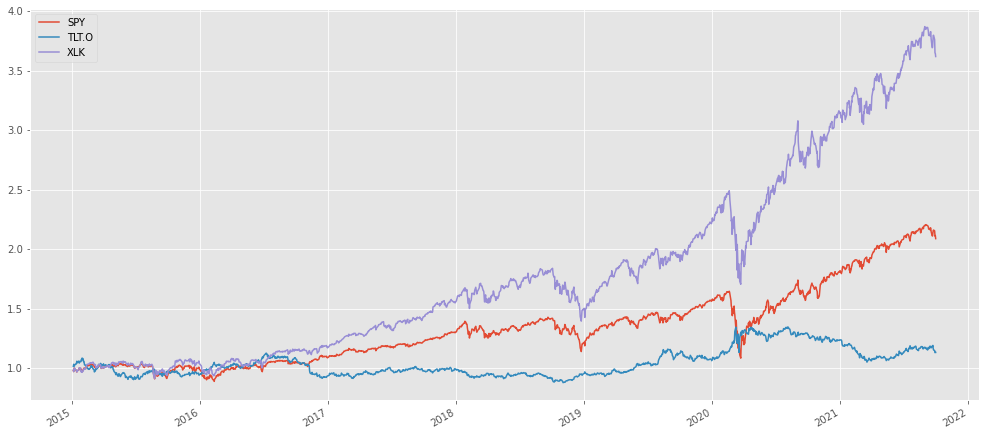

In [2]:
import os
DATA_PATH = os.path.join('..', 'silver', 'daily_feature_set.csv')
NAME_SUFFIX = "daily_v2"
ASSETS = ['SPY', 'TLT.O', 'XLK']
START_OUT_SAMPLE = '2015-01-05'
END_OUT_SAMPLE = '2021-09-30'

#=======================================================| TRAIN

data = pd.read_csv(DATA_PATH, parse_dates=True, index_col=0)
data = data.loc[(~data['TLT.O_logReturns'].isnull()) | (~data['TAIL.K_logReturns'].isnull())]
data.fillna(0, inplace=True)

start_out_samp = pd.Timestamp(START_OUT_SAMPLE)
end_out_samp = pd.Timestamp(END_OUT_SAMPLE)

df_out_sample = data.loc[start_out_samp:end_out_samp, :]


df_out_sample.loc[:,'XLK_cumsum'] = df_out_sample[['XLK_logReturns']].cumsum()
df_out_sample.loc[:, 'XLK'] = df_out_sample['XLK_cumsum'].apply(np.exp)

df_out_sample.loc[:, 'SPY_cumsum'] = df_out_sample[['SPY_logReturns']].cumsum()
df_out_sample.loc[:, 'SPY'] = df_out_sample['SPY_cumsum'].apply(np.exp)

df_out_sample.loc[:, 'TLT.O_cumsum'] = df_out_sample[['TLT.O_logReturns']].cumsum()
df_out_sample.loc[:, 'TLT.O'] = df_out_sample['TLT.O_cumsum'].apply(np.exp)

df_out_sample[['SPY', 'TLT.O', 'XLK']].plot(figsize=(17, 8))

## DPG

#### Teste com LeakyReLU ao invés de ReLU

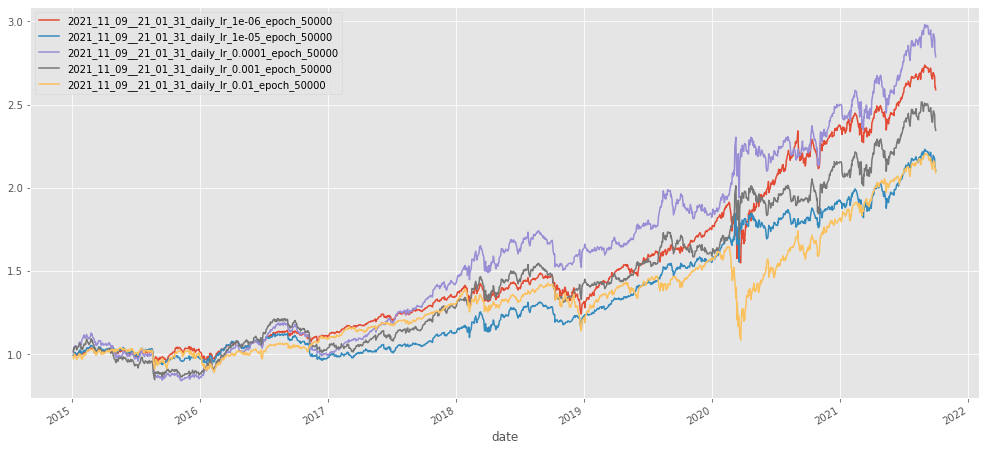

In [4]:
df_result_back = pd.read_csv('../results/backtest/2021_11_09__22_21_50_aggregated_daily_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))
plt.savefig('/mnt/c/Users/victo/Documents/Mestrado/Dissertacao/tese/Imagens/resultado_dpg_simples.png')

In [90]:
df_result_back.columns

Index(['2021_11_09__21_01_31_daily_lr_1e-06_epoch_50000',
       '2021_11_09__21_01_31_daily_lr_1e-05_epoch_50000',
       '2021_11_09__21_01_31_daily_lr_0.0001_epoch_50000',
       '2021_11_09__21_01_31_daily_lr_0.001_epoch_50000',
       '2021_11_09__21_01_31_daily_lr_0.01_epoch_50000'],
      dtype='object')

<AxesSubplot:xlabel='epoch'>

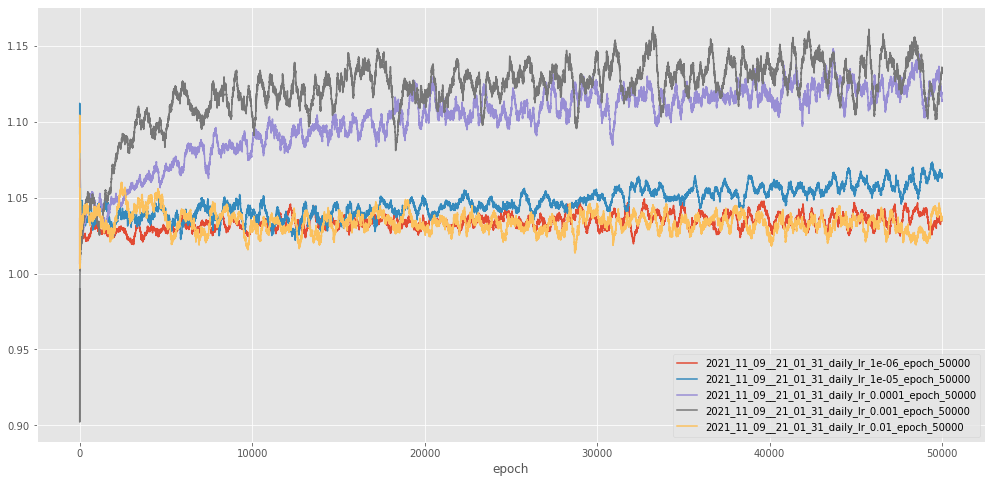

In [91]:
#df_result_train = pd.read_csv('../results/portfolio_values/2021_11_03__11_42_20_aggregated.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_09__22_21_49_aggregated_daily_v2.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

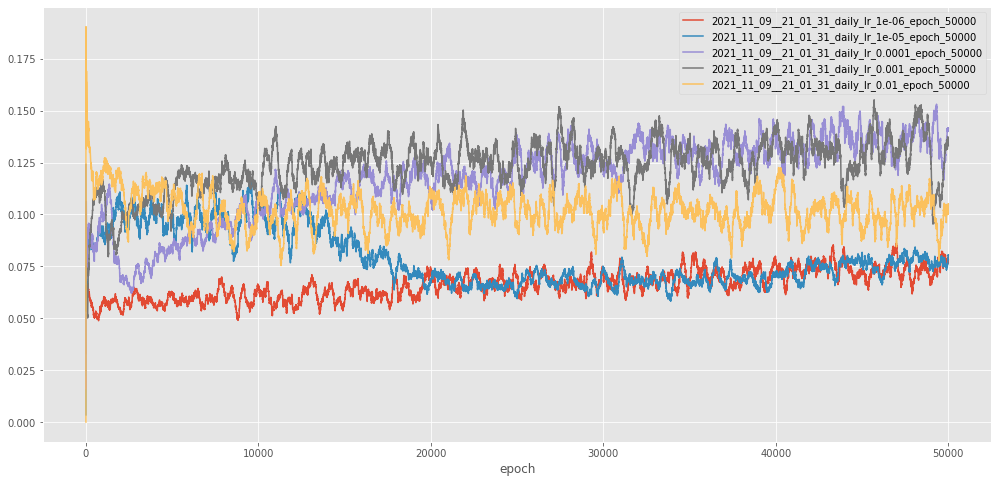

In [92]:
df_result_train1_std = pd.read_csv('../results/portfolio_values/2021_11_09__22_21_49_aggregated_daily_v2.csv', index_col=0).rolling(300, min_periods=1).std()
df_result_train1_std.plot(figsize=(17,8))

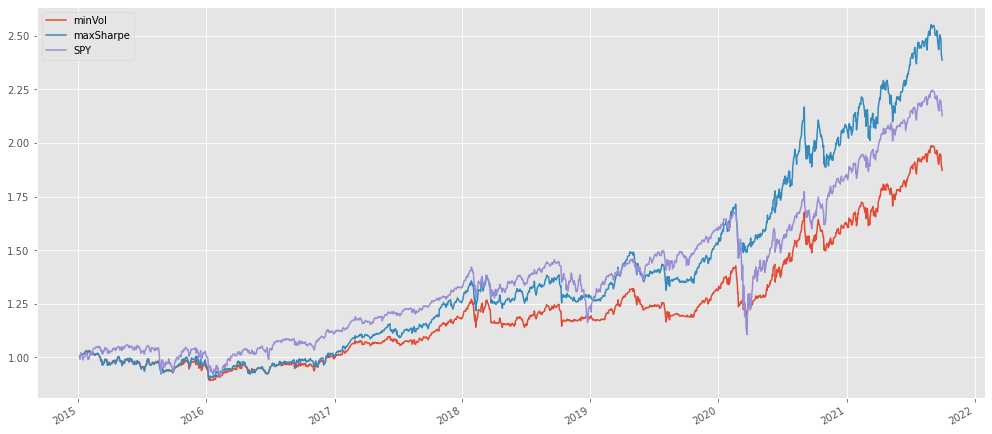

In [5]:
df_baseline = pd.read_csv("../results/backtest/baseline.csv", parse_dates=True, index_col=0)
df_baseline.plot(figsize=(17,8))

plt.savefig('/mnt/c/Users/victo/Documents/Mestrado/Dissertacao/tese/Imagens/baseline_problema.png')

In [98]:
map_rename = {
    c: c.replace("2021_11_09__21_01_31_daily_", "")
    for c in df_result_back.columns
}
df_result_back = df_result_back.rename(columns=map_rename)

Text(0.5, 0, 'Date')

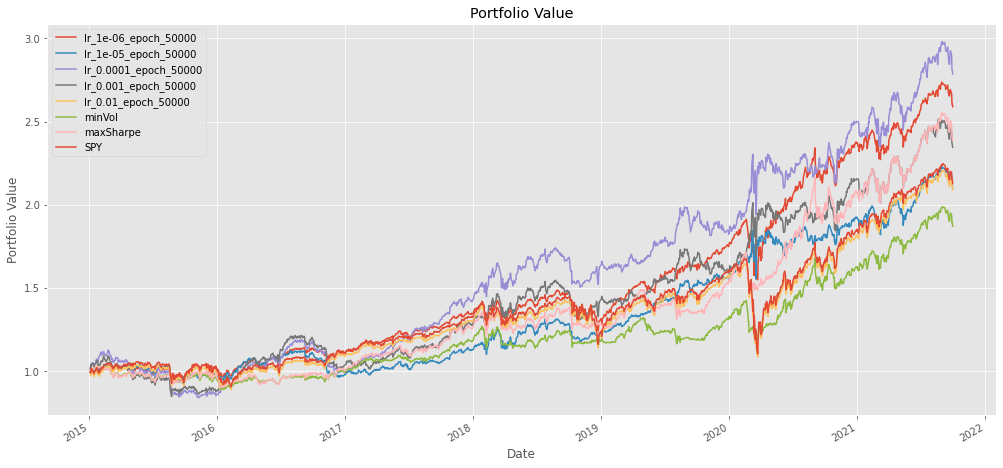

In [99]:
results_backtest = pd.concat([df_result_back, df_baseline], axis=1)
results_backtest[~results_backtest.isnull().any(axis=1)].plot(figsize=(17,8))
plt.title('Portfolio Value')
plt.ylabel('Portfolio Value')
plt.xlabel('Date')
#plt.savefig("../results/plots/simple_network_dpg_portfolio_value.png")

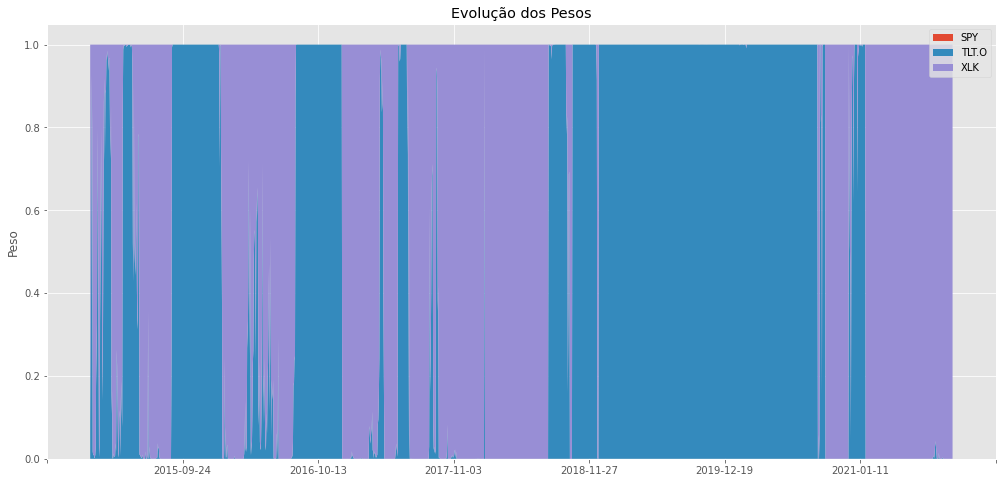

In [8]:
df_w = pd.read_csv('../results/weights/2021_11_09__21_01_31_daily_lr_0.0001_epoch_50000.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
start, end = ax.get_xlim()
step_size = (end - start) / 7
ax.xaxis.set_ticks(np.arange(start, end, step_size))
ax.legend()


plt.savefig('/mnt/c/Users/victo/Documents/Mestrado/Dissertacao/tese/Imagens/evolucao_pesos_dpg_simples.png')
plt.show()

Este modelo já apresentou um desempenho melhor em relação aos outros, confiando no ativo tech e no de proteção para poder ter um ganho mais alto e poder passar ileso pelas crises.

#### Teste com ReLU ao invés de LeakyReLU

<AxesSubplot:xlabel='date'>

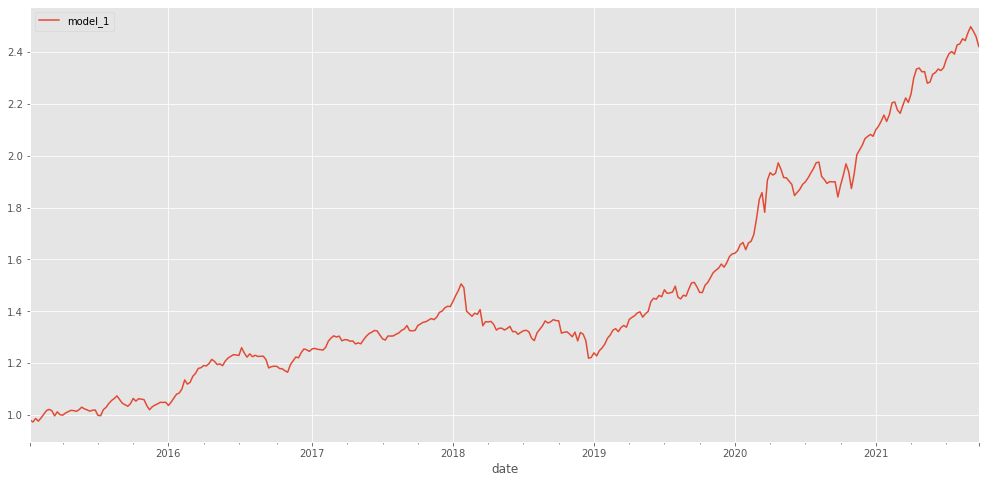

In [53]:
df_result_back = pd.read_csv('../results/backtest/2021_11_09__18_29_51.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

Apesar de não ter um valor de ativo muito grande ao final do período, é perceptível como o modelo conseguiu manter um portfólio estável durante os períodos de crise, confiando no ativo de proteção.

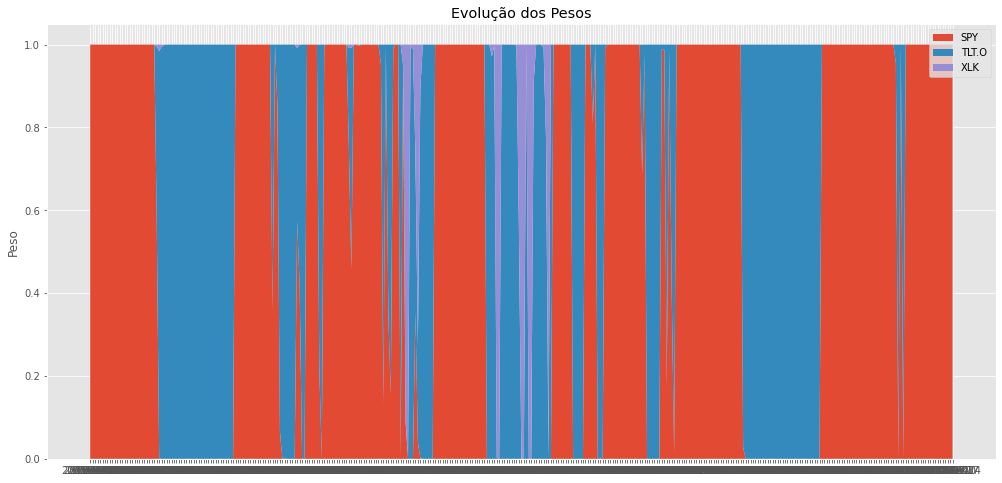

In [70]:
df_w = pd.read_csv('../results/weights/2021_11_09__18_29_51.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))
ax.stackplot(df_w.index, df_w['SPY'], df_w['TLT.O'], df_w['XLK'], labels=df_w.columns)
ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()
plt.show()

<AxesSubplot:>

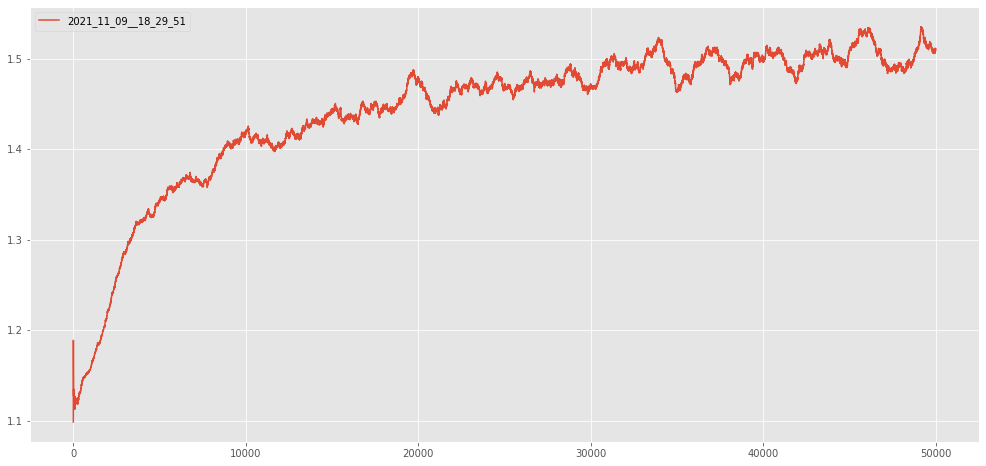

In [79]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_09__18_29_51.csv').rolling(1000, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

<AxesSubplot:xlabel='date'>

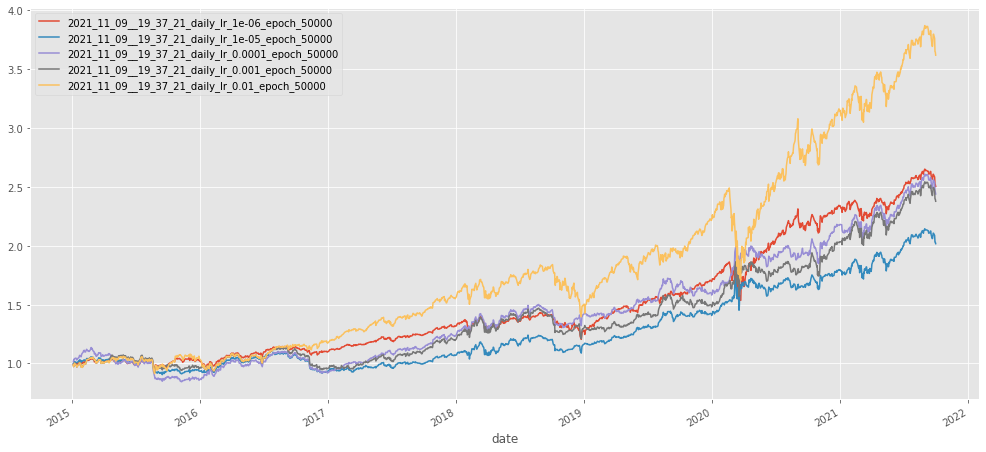

In [80]:
df_result_back = pd.read_csv('../results/backtest/2021_11_09__20_56_33_aggregated_daily_v2.csv', parse_dates=True, index_col=0)
df_result_back.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

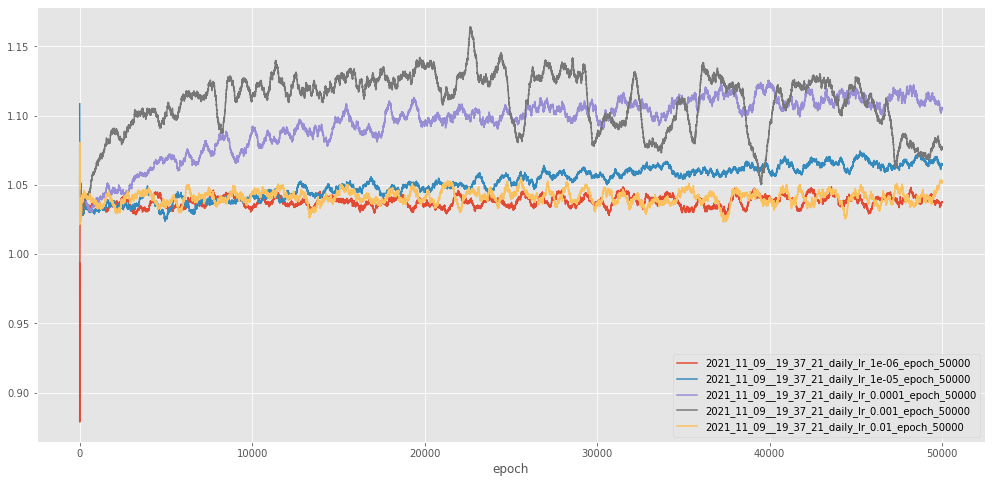

In [84]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_09__20_56_32_aggregated_daily_v2.csv', index_col=0).rolling(500, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

---

## Actor-Critic Action-value function

Apesar de aparentar ter bons resultados, quando vemos o resultado do backtest considerando diferentes períodos de treinamento, vemos que eles não interferem no resultado final. Muito pelo contrário, existe uma correlação bem forte entre o desempenho no backtest entre diferentes modelos, o que parece ser indício de que o desempenho dele é aleatório. 

Aí temos algumas teorias. Pode ser tanto que as features não são descritivas o sufienciente, ou que o modelo não é complexo o suficiente, de forma que o modelo não consegue modelar o  comportamento para os ativos. Assim, é como se "tanto faz" as variáveis de entrada, o modelo não consegue aprender nada, e todos os resultados são aleatórios, fruto da arquitetura como um todo. 

#### Teste verificando diferentes valores de passo

<AxesSubplot:xlabel='date'>

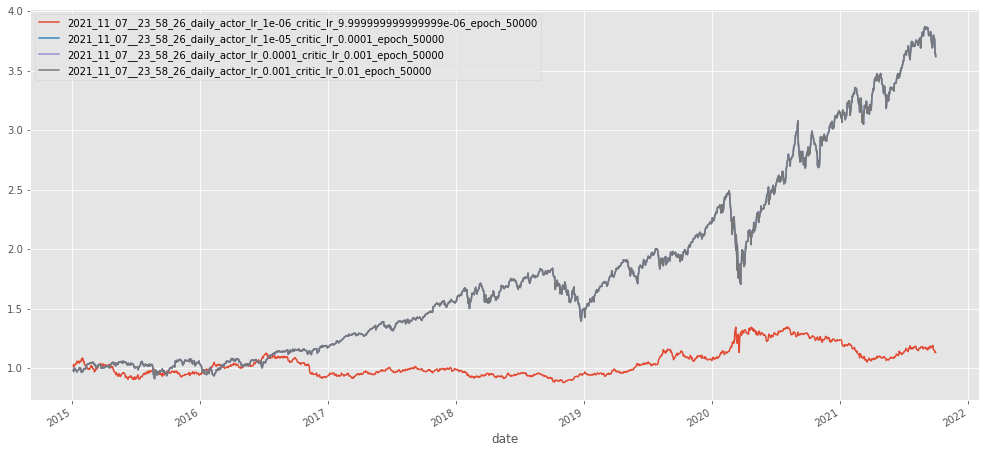

In [119]:
df_result_back1 = pd.read_csv('../results/backtest/2021_11_08__03_51_23_aggregated_daily_v2.csv', parse_dates=True, index_col=0)
df_result_back1.plot(figsize=(17,8))

In [120]:
df_result_back1.corr()

,2021_11_07__23_58_26_daily_actor_lr_1e-06_critic_lr_9.999999999999999e-06_epoch_50000,2021_11_07__23_58_26_daily_actor_lr_1e-05_critic_lr_0.0001_epoch_50000,2021_11_07__23_58_26_daily_actor_lr_0.0001_critic_lr_0.001_epoch_50000,2021_11_07__23_58_26_daily_actor_lr_0.001_critic_lr_0.01_epoch_50000
2021_11_07__23_58_26_daily_actor_lr_1e-06_critic_lr_9.999999999999999e-06_epoch_50000,1.000000,0.647105,0.647105,0.647105
2021_11_07__23_58_26_daily_actor_lr_1e-05_critic_lr_0.0001_epoch_50000,0.647105,1.000000,1.000000,1.000000
2021_11_07__23_58_26_daily_actor_lr_0.0001_critic_lr_0.001_epoch_50000,0.647105,1.000000,1.000000,1.000000
2021_11_07__23_58_26_daily_actor_lr_0.001_critic_lr_0.01_epoch_50000,0.647105,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='epoch'>

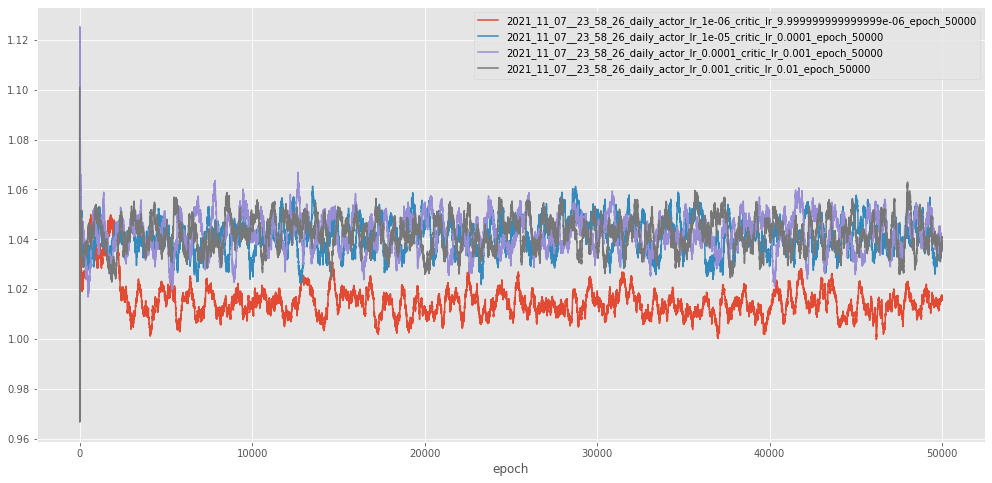

In [121]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_08__03_51_22_aggregated_daily_v2.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

#### Teste verificando o desempenho no backtest para diferentes épocas do treinamento

<AxesSubplot:xlabel='date'>

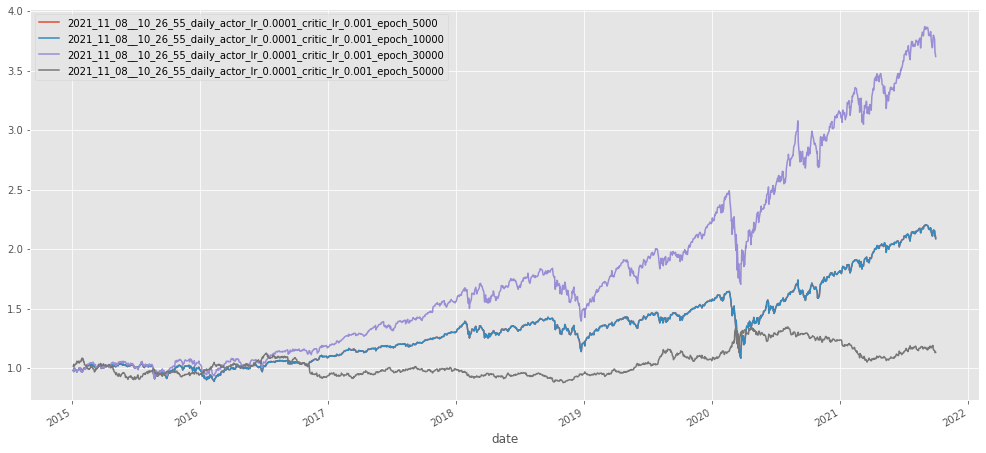

In [122]:
df_result_back3 = pd.read_csv('../results/backtest/2021_11_08__13_30_58_aggregated_daily_v2.csv', parse_dates=True, index_col=0)
df_result_back3.plot(figsize=(17,8))

In [123]:
df_result_back3.corr()

,2021_11_08__10_26_55_daily_actor_lr_0.0001_critic_lr_0.001_epoch_5000,2021_11_08__10_26_55_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000,2021_11_08__10_26_55_daily_actor_lr_0.0001_critic_lr_0.001_epoch_30000,2021_11_08__10_26_55_daily_actor_lr_0.0001_critic_lr_0.001_epoch_50000
2021_11_08__10_26_55_daily_actor_lr_0.0001_critic_lr_0.001_epoch_5000,1.000000,1.000000,0.986437,0.542304
2021_11_08__10_26_55_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000,1.000000,1.000000,0.986437,0.542304
2021_11_08__10_26_55_daily_actor_lr_0.0001_critic_lr_0.001_epoch_30000,0.986437,0.986437,1.000000,0.647104
2021_11_08__10_26_55_daily_actor_lr_0.0001_critic_lr_0.001_epoch_50000,0.542304,0.542304,0.647104,1.000000


<AxesSubplot:xlabel='epoch'>

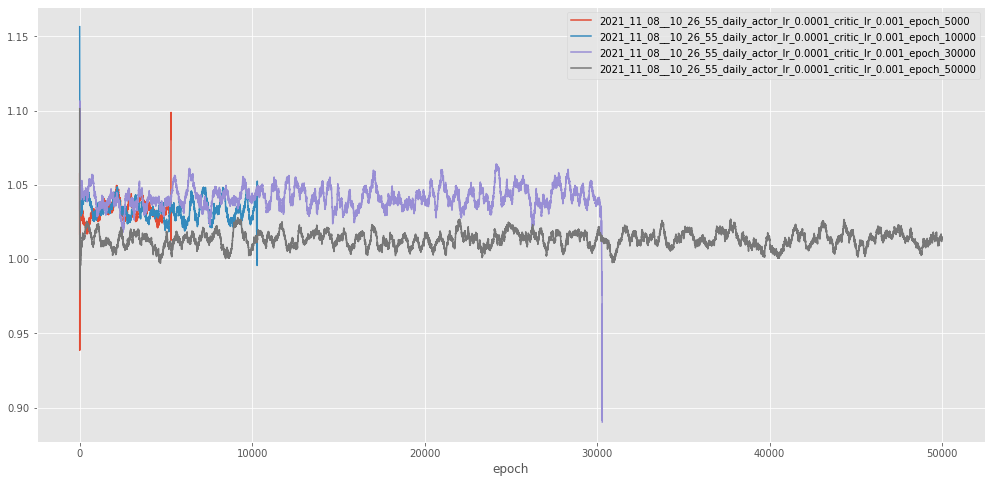

In [124]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_08__13_30_57_aggregated_daily_v2.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

#### Teste com diferentes valores de gamma

<AxesSubplot:xlabel='date'>

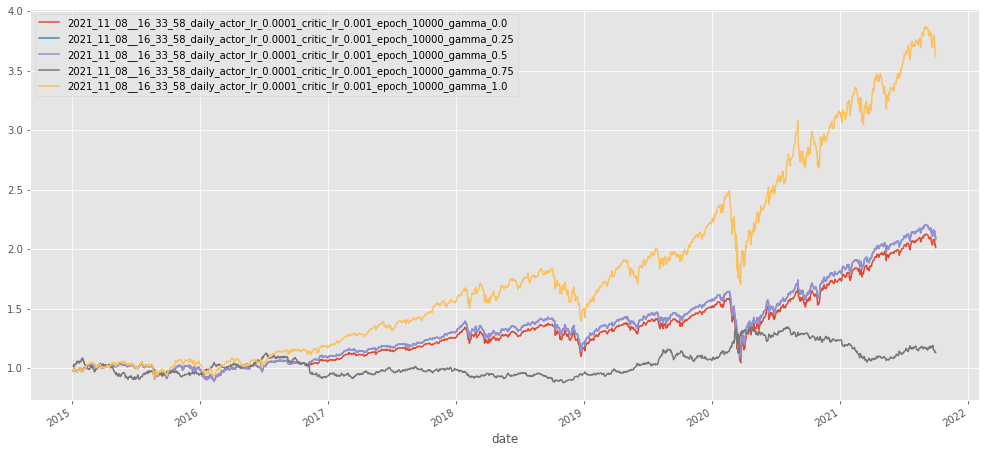

In [127]:
df_result_back4 = pd.read_csv('../results/backtest/2021_11_08__17_25_50_aggregated_daily_v2.csv', parse_dates=True, index_col=0)
df_result_back4.plot(figsize=(17,8))

In [128]:
df_result_back4.corr()

,2021_11_08__16_33_58_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_0.0,2021_11_08__16_33_58_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_0.25,2021_11_08__16_33_58_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_0.5,2021_11_08__16_33_58_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_0.75,2021_11_08__16_33_58_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_1.0
2021_11_08__16_33_58_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_0.0,1.000000,0.999280,0.999280,0.548600,0.987411
2021_11_08__16_33_58_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_0.25,0.999280,1.000000,1.000000,0.542441,0.986437
2021_11_08__16_33_58_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_0.5,0.999280,1.000000,1.000000,0.542441,0.986437
2021_11_08__16_33_58_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_0.75,0.548600,0.542441,0.542441,1.000000,0.647229
2021_11_08__16_33_58_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_1.0,0.987411,0.986437,0.986437,0.647229,1.000000


<AxesSubplot:xlabel='epoch'>

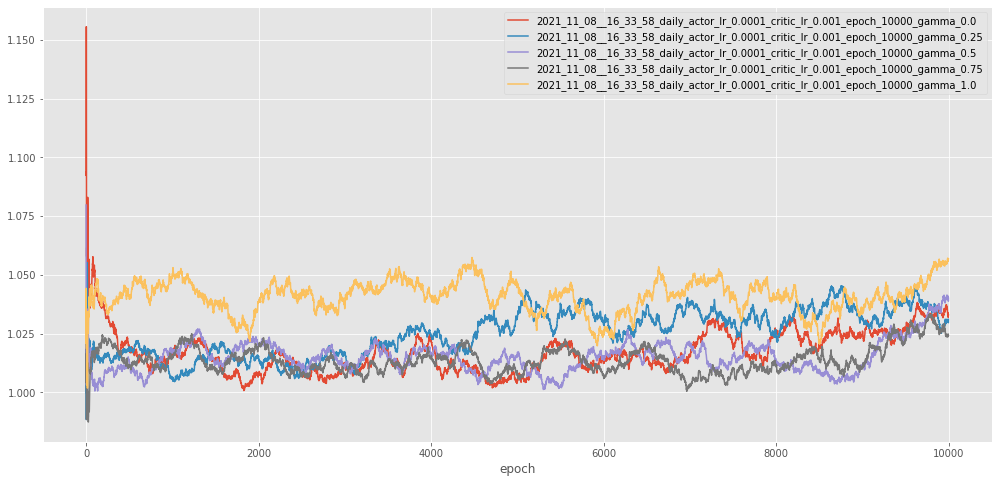

In [129]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_08__17_25_50_aggregated_daily_v2.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

#### Teste com um modelo mais complexo para o crítico

<AxesSubplot:xlabel='date'>

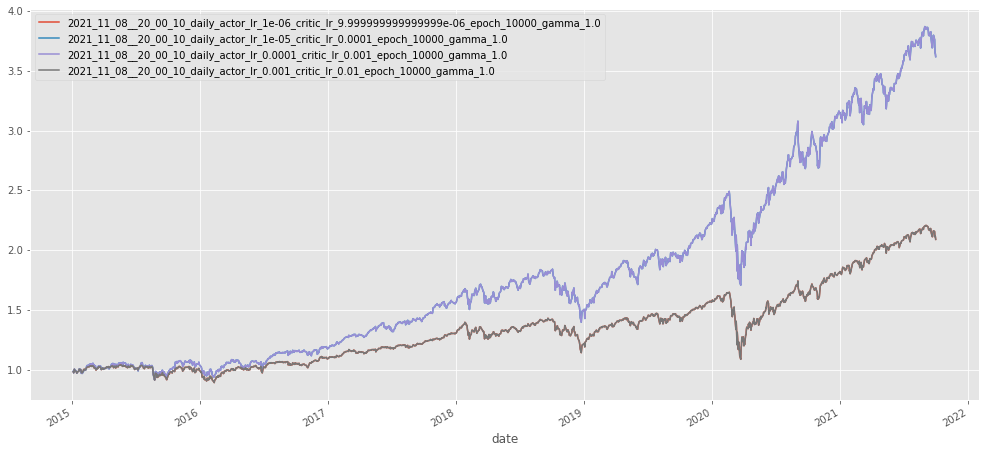

In [140]:
df_result_back3 = pd.read_csv('../results/backtest/2021_11_08__21_06_37_aggregated_daily_v2.csv', parse_dates=True, index_col=0)
df_result_back3.plot(figsize=(17,8))

In [141]:
df_result_back3.corr()

,2021_11_08__20_00_10_daily_actor_lr_1e-06_critic_lr_9.999999999999999e-06_epoch_10000_gamma_1.0,2021_11_08__20_00_10_daily_actor_lr_1e-05_critic_lr_0.0001_epoch_10000_gamma_1.0,2021_11_08__20_00_10_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_1.0,2021_11_08__20_00_10_daily_actor_lr_0.001_critic_lr_0.01_epoch_10000_gamma_1.0
2021_11_08__20_00_10_daily_actor_lr_1e-06_critic_lr_9.999999999999999e-06_epoch_10000_gamma_1.0,1.000000,0.986437,0.986437,1.000000
2021_11_08__20_00_10_daily_actor_lr_1e-05_critic_lr_0.0001_epoch_10000_gamma_1.0,0.986437,1.000000,1.000000,0.986437
2021_11_08__20_00_10_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_1.0,0.986437,1.000000,1.000000,0.986437
2021_11_08__20_00_10_daily_actor_lr_0.001_critic_lr_0.01_epoch_10000_gamma_1.0,1.000000,0.986437,0.986437,1.000000


<AxesSubplot:xlabel='epoch'>

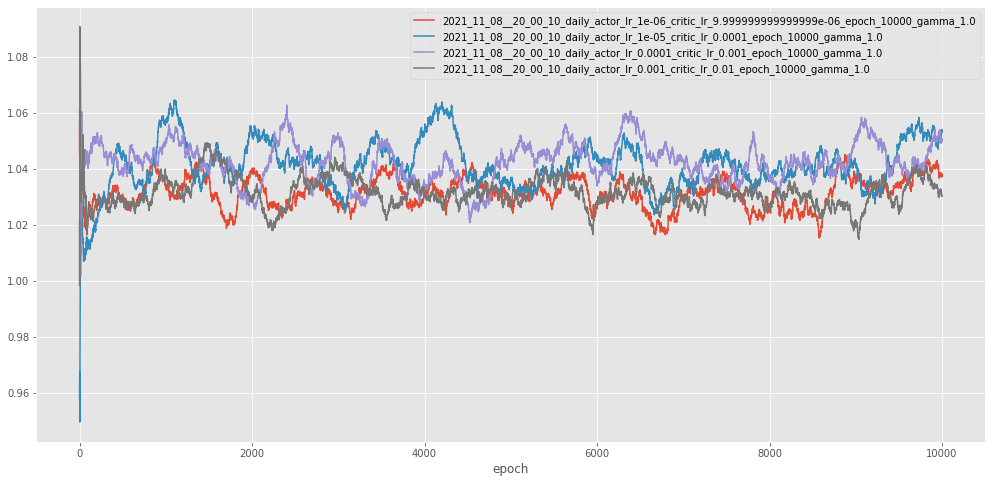

In [142]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_08__21_06_37_aggregated_daily_v2.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

## Actor-Critic com Planning

#### Teste com diferentes valores de gamma

<AxesSubplot:xlabel='date'>

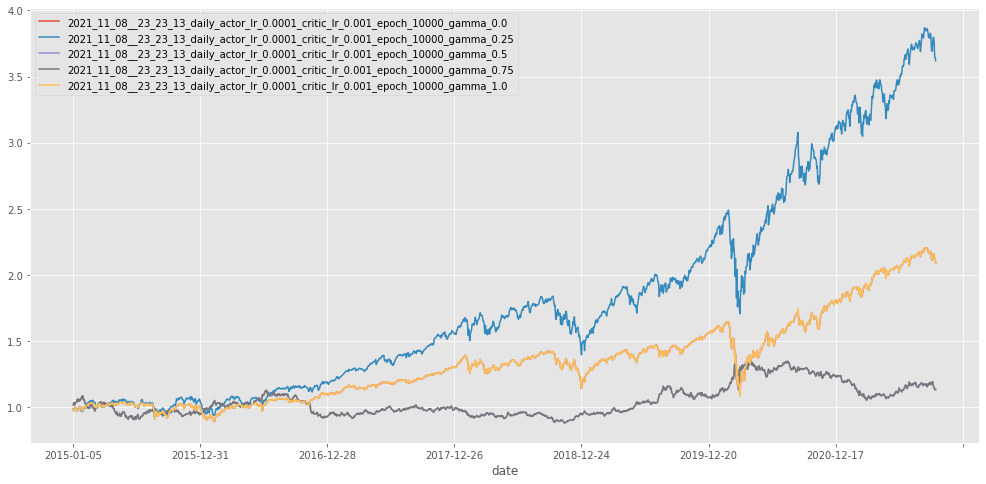

In [4]:
df_result_backtest = pd.read_csv('../results/backtest/2021_11_09__00_23_40_aggregated_daily_v2.csv', index_col=0)
df_result_backtest.plot(figsize=(17,8))

In [6]:
map_rename = {
    c: c.replace("2021_11_08__23_23_13_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_", "")
    for c in df_result_backtest.columns
}
df_result_back = df_result_backtest.rename(columns=map_rename)
df_result_back.corr()

,gamma_0.0,gamma_0.25,gamma_0.5,gamma_0.75,gamma_1.0
gamma_0.0,1.000000,0.986436,0.542560,0.542312,1.000000
gamma_0.25,0.986436,1.000000,0.647340,0.647120,0.986436
gamma_0.5,0.542560,0.647340,1.000000,1.000000,0.542569
gamma_0.75,0.542312,0.647120,1.000000,1.000000,0.542321
gamma_1.0,1.000000,0.986436,0.542569,0.542321,1.000000


<AxesSubplot:xlabel='epoch'>

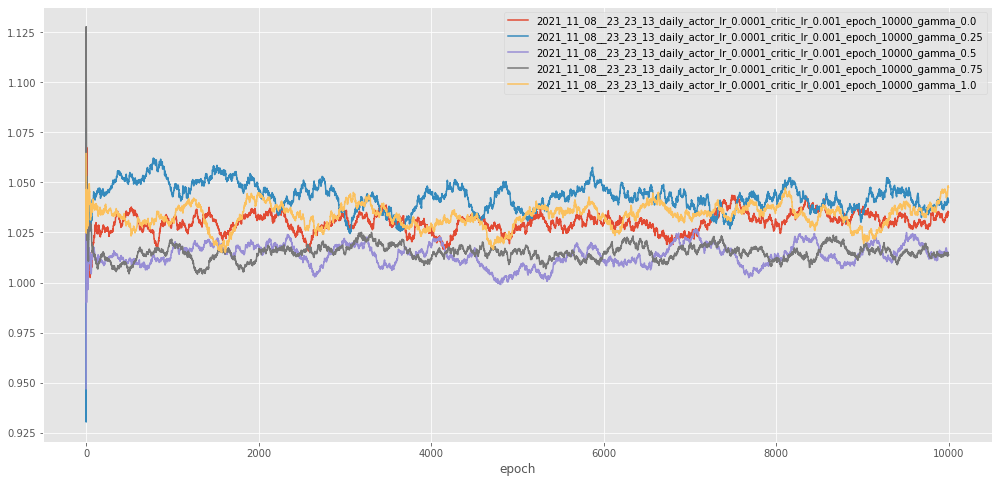

In [146]:
df_result_train = pd.read_csv('../results/portfolio_values/2021_11_09__00_23_40_aggregated_daily_v2.csv', index_col=0).rolling(300, min_periods=1).mean()
df_result_train.plot(figsize=(17,8))

<AxesSubplot:xlabel='epoch'>

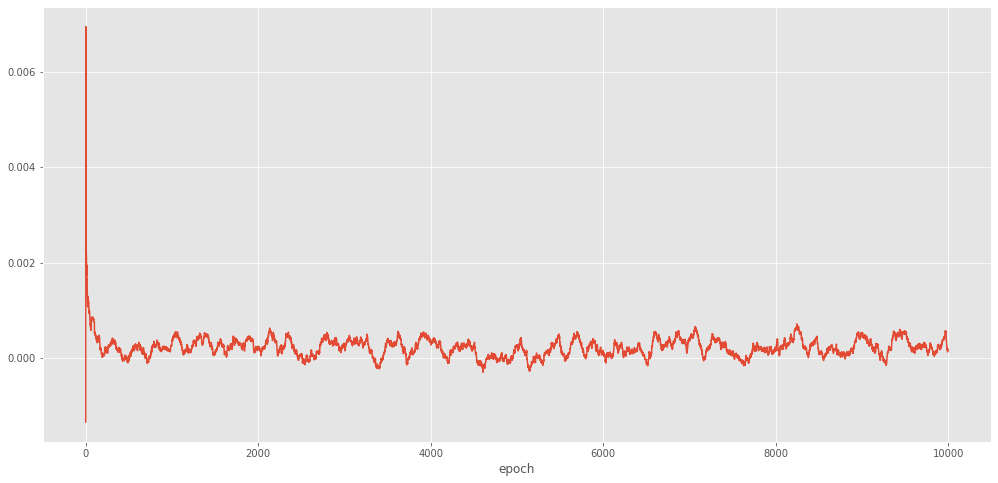

In [172]:
df_result_loss = pd.read_csv('../results/losses/actor_critic/2021_11_08__23_23_13_daily_actor_lr_0.0001_critic_lr_0.001_epoch_10000_gamma_0.5.csv', index_col=0).rolling(100, min_periods=1).mean()
df_result_loss.loc[:, 'actor loss'].plot(figsize=(17,8))

In [157]:
df_result_loss

,actor loss,advantage loss (critic delta),expr replay loss
epoch,,,
0,-0.001340,-3.053850e-04,NaN
1,-0.001212,4.889168e-04,NaN
2,0.006942,-3.321296e-03,NaN
3,0.004478,-2.091144e-03,NaN
4,0.003560,-1.749167e-03,NaN
...,...,...,...
9995,0.000217,-4.921100e-07,8.991546e-08
9996,0.000222,-1.154676e-06,8.991546e-08
9997,0.000222,-1.428541e-06,8.991546e-08


#### Teste com diferentes learning rates

<AxesSubplot:xlabel='date'>

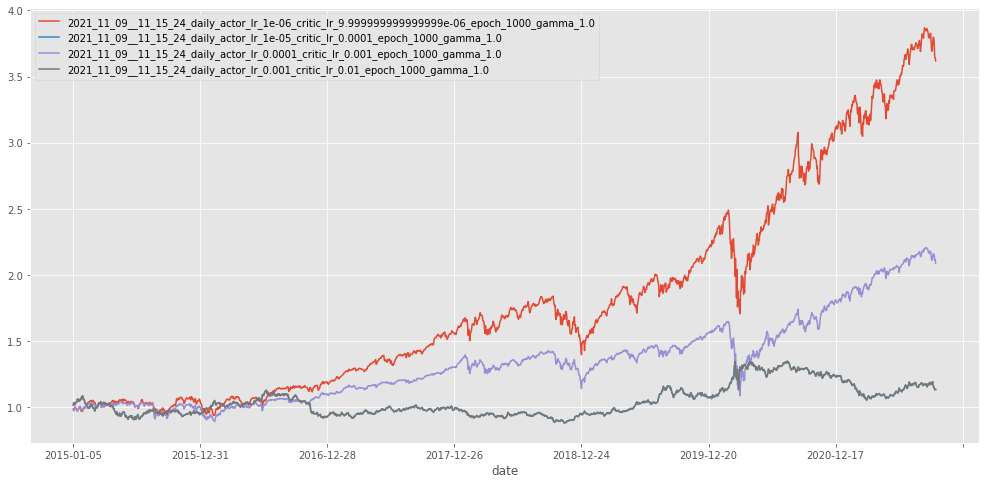

In [23]:
df_result_backtest = pd.read_csv('../results/backtest/2021_11_09__11_21_20_aggregated_daily_v2.csv', index_col=0)
df_result_backtest.plot(figsize=(17,8))

É possível ver que cada modelo aprendeu a seguir um dos três ativos da composição da carteira, apenas, ao invés de equilibrar o pesos entre eles, afinal as curvas são idênticas às curvas dos retornos dos ativos isolados.

In [8]:
df_result_backtest.columns

Index(['2021_11_09__11_15_24_daily_actor_lr_1e-06_critic_lr_9.999999999999999e-06_epoch_1000_gamma_1.0',
       '2021_11_09__11_15_24_daily_actor_lr_1e-05_critic_lr_0.0001_epoch_1000_gamma_1.0',
       '2021_11_09__11_15_24_daily_actor_lr_0.0001_critic_lr_0.001_epoch_1000_gamma_1.0',
       '2021_11_09__11_15_24_daily_actor_lr_0.001_critic_lr_0.01_epoch_1000_gamma_1.0'],
      dtype='object')

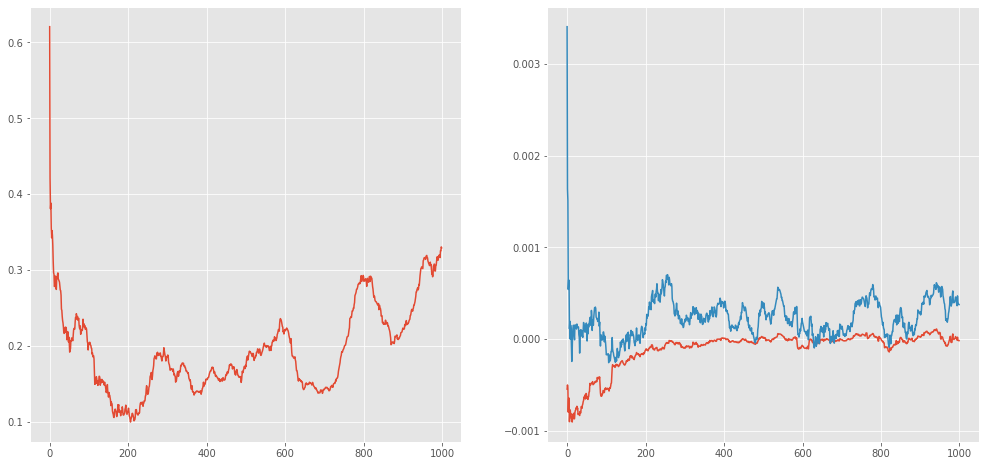

In [24]:
df_result_loss = pd.read_csv('../results/losses/actor_critic/2021_11_09__11_15_24_daily_actor_lr_1e-06_critic_lr_9.999999999999999e-06_epoch_1000_gamma_1.0.csv', index_col=0).rolling(30, min_periods=1).mean()
fig, axs = plt.subplots(1, 2, figsize=(17,8))
axs[0].plot(df_result_loss.index, df_result_loss['actor loss'])
axs[1].plot(df_result_loss.index, df_result_loss[['critic loss', 'delta']])

#### Modelo com melhor gamma e melhor learning_rate

<AxesSubplot:xlabel='date'>

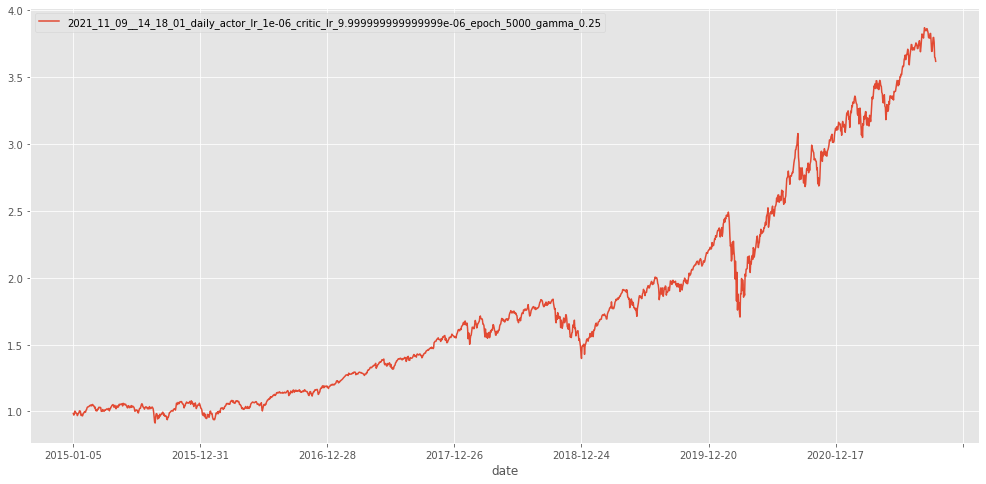

In [26]:
df_result_backtest = pd.read_csv('../results/backtest/2021_11_09__14_18_01_daily_actor_lr_1e-06_critic_lr_9.999999999999999e-06_epoch_5000_gamma_0.25.csv', index_col=0)
df_result_backtest.plot(figsize=(17,8))

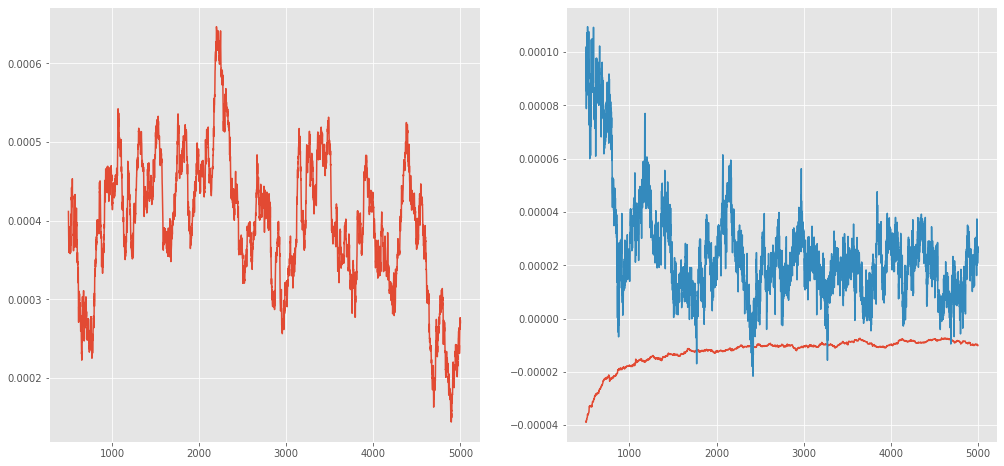

In [35]:
df_result_loss = pd.read_csv('../results/losses/actor_critic/2021_11_09__14_18_01_daily_actor_lr_1e-06_critic_lr_9.999999999999999e-06_epoch_5000_gamma_0.25.csv', index_col=0).rolling(300, min_periods=1).mean()
fig, axs = plt.subplots(1, 2, figsize=(17,8))
axs[0].plot(df_result_loss.index[500:], df_result_loss['actor loss'][500:])
axs[1].plot(df_result_loss.index[500:], df_result_loss[['critic loss', 'delta']][500:])

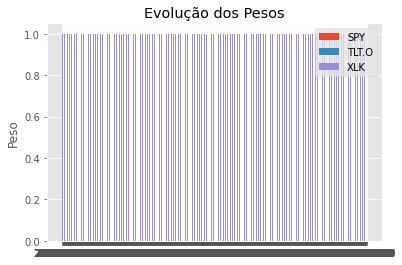

In [38]:
df_w = pd.read_csv('../results/weights/2021_11_09__14_18_01_daily_actor_lr_1e-06_critic_lr_9.999999999999999e-06_epoch_5000_gamma_0.25.csv', index_col=0)

fig, ax = plt.subplots(figsize=(17,8))

for asset in df_w.columns:
    ax.bar(df_w.index, df_w[asset], width=0.35, label=asset)

ax.set_ylabel('Peso')
ax.set_title('Evolução dos Pesos')
ax.legend()

plt.show()

<AxesSubplot:xlabel='date'>

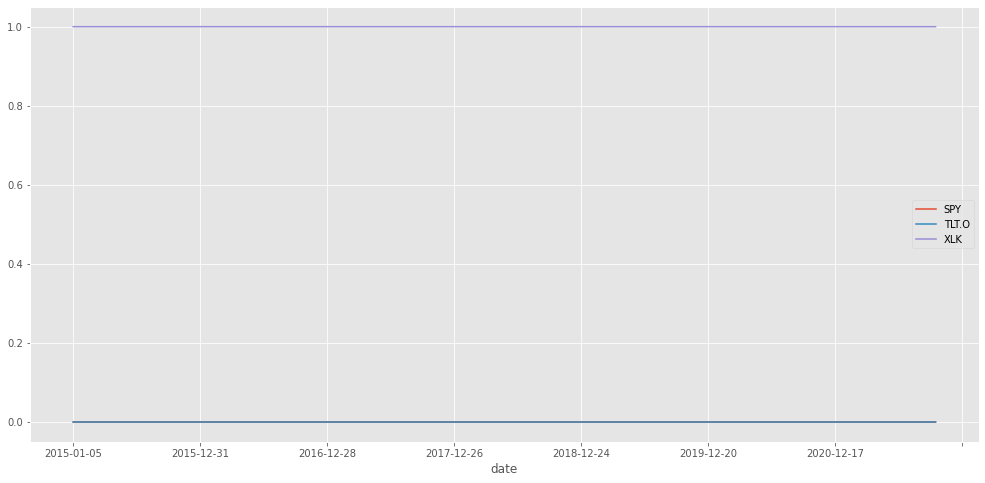

In [39]:
df_w.plot(figsize=(17,8))

#### Checando como ficam os pesos com um treinamento com gamma = 1

Dessa vez eu treinei 4 modelos idênticos, para verificar se os resultados permanecem parecidos, ou se apresentam variação entre eles.

<AxesSubplot:xlabel='date'>

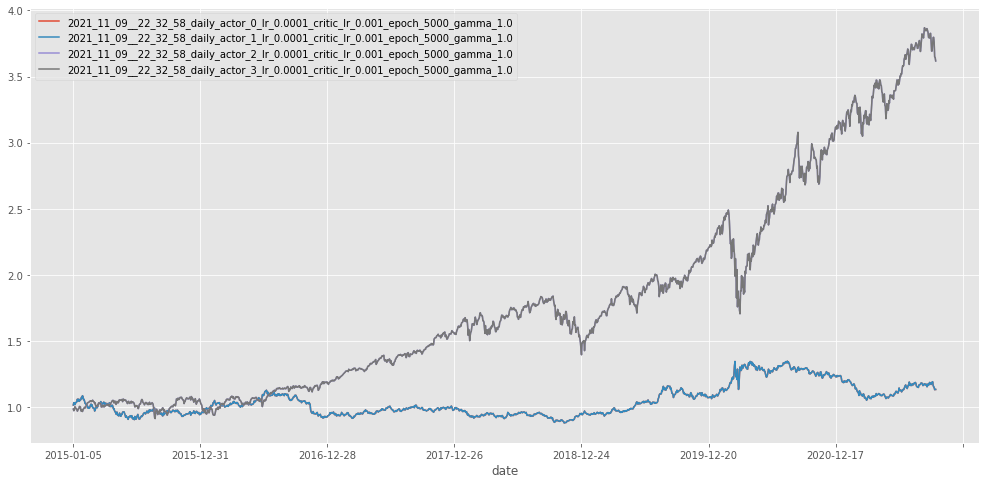

In [103]:
df_result_backtest = pd.read_csv('../results/backtest/2021_11_09__23_00_28_aggregated_daily_v2.csv', index_col=0)
df_result_backtest.plot(figsize=(17,8))

In [104]:
df_result_backtest.columns

Index(['2021_11_09__22_32_58_daily_actor_0_lr_0.0001_critic_lr_0.001_epoch_5000_gamma_1.0',
       '2021_11_09__22_32_58_daily_actor_1_lr_0.0001_critic_lr_0.001_epoch_5000_gamma_1.0',
       '2021_11_09__22_32_58_daily_actor_2_lr_0.0001_critic_lr_0.001_epoch_5000_gamma_1.0',
       '2021_11_09__22_32_58_daily_actor_3_lr_0.0001_critic_lr_0.001_epoch_5000_gamma_1.0'],
      dtype='object')

Como deu pra notar, novamente os modelos se ajustaram a algum dos pesos. Uma teoria é de que o crítico esteja aproximando sempre dos valores de um dos ativos, através dos rewards, e que por isso acabe caindo em um "ótimo local" durante a suan otimização. Com isso, o actor acaba indo junto para uma bacia que reforce os pesos concentrados mais nesse ótimo local.

#### Teste com Actor-Critic Sem Planning e com Eligibility Traces

<AxesSubplot:xlabel='date'>

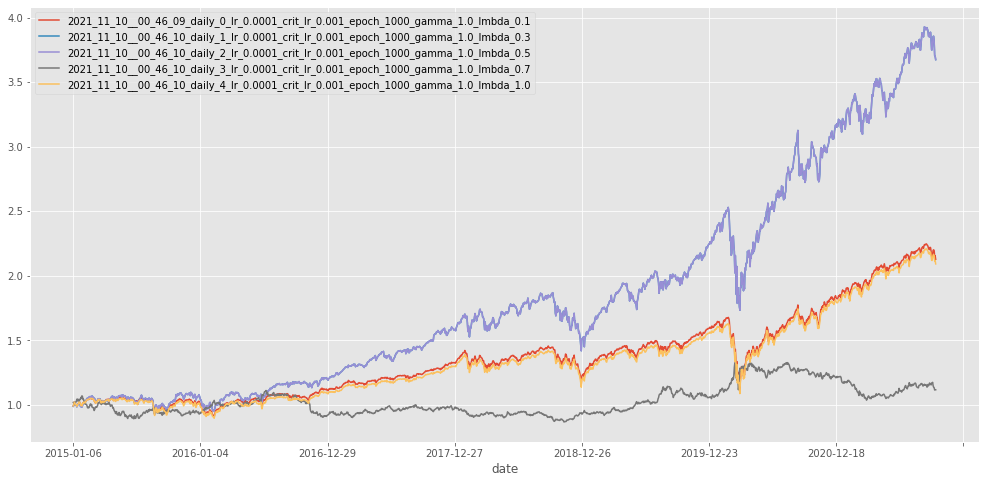

In [108]:
df_result_backtest = pd.read_csv('../results/backtest/2021_11_10__00_52_12_aggregated_daily_v2.csv', index_col=0)
df_result_backtest.plot(figsize=(17,8))

Novamente os agentes tenderam a aprender a seguir a um dos ativos, e falharam em equilibrar os pesos.

#### Teste mudando o loss do crítico

Usando $\delta^2$

<AxesSubplot:xlabel='date'>

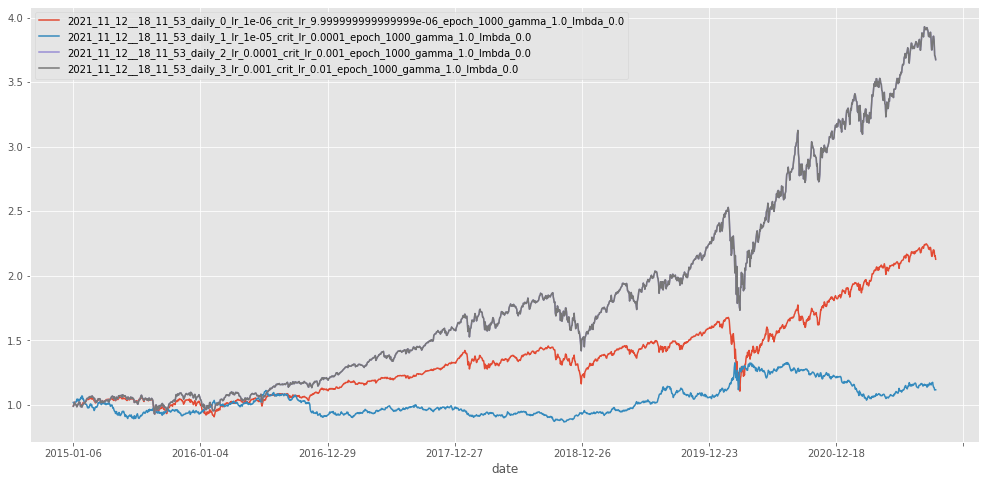

In [4]:
df_result_backtest = pd.read_csv('../results/backtest/2021_11_12__18_17_57_aggregated_daily_v2.csv', index_col=0)
df_result_backtest.plot(figsize=(17,8))

---

In [64]:
import torch

In [115]:
x = torch.tensor(1., requires_grad = True)
y = torch.tensor(5., requires_grad=True)

w = y*3*x
z = x*2

In [116]:
w.backward()
x.grad=None
z.backward()

In [117]:
y.grad

tensor(3.)

In [118]:
x.grad

tensor(2.)

In [139]:
a = torch.tensor([1,2,3]).view(-1, 1)
b = torch.tensor([4, 5,6]).view(-1, 1)
dim = len(a.shape) - 1
torch.cat([a, b], dim=dim)

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [101]:
a, (b, c , d) = (1, (2, 3, 4))

In [102]:
b

2